In [8]:
### import library and load data
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.plotly as py
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import os

# Load dataset
data = pd.read_csv('./dataset/2015.csv')

In [9]:
ayrimcol=[]

for col in data.columns:
    print(col)
    ayrimcol.append(col.split())

Country
Region
Happiness Rank
Happiness Score
Standard Error
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual


In [11]:
region=data['Region'].value_counts()
region_values=region.values
region_index=region.index

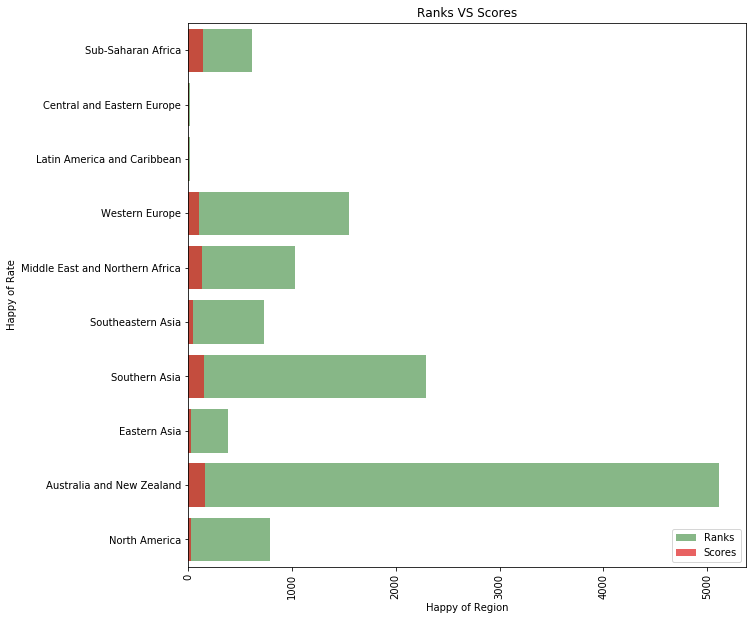

In [12]:
data.columns=['Country','Region','Happiness_Rank','Happiness_Score','Standart_Error','Economy_GPD_Capital','Family','Healt_Life_Expectancy','Freedom','Trust_Goverment_Corruption','Generosity','Dystopia_Residual']

happiess_ranks=[]
happiess_scores=[]

for i in data.Region.unique():
    happiess_ranks.append(sum(data[data['Region']==i].Happiness_Rank))
    happiess_scores.append(sum(data[data['Region']==i].Happiness_Score))

f,ax=plt.subplots(figsize=(10,10))
sns.barplot(y=region_index,x=happiess_ranks,color='green',alpha=0.5,label='Ranks')
sns.barplot(y=region_index,x=happiess_scores,color='red',alpha=0.7,label='Scores')
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Happy of Region',ylabel='Happy of Rate',title='Ranks VS Scores')
plt.xticks(rotation=90)
plt.show()

In [15]:
data[data['Freedom']==0]
#The country with the lowest rate of freedom and the country with the highest

,Country,Region,Happiness_Rank,Happiness_Score,Standart_Error,Economy_GPD_Capital,Family,Healt_Life_Expectancy,Freedom,Trust_Goverment_Corruption,Generosity,Dystopia_Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [16]:
data[data['Freedom']>0.66]

,Country,Region,Happiness_Rank,Happiness_Score,Standart_Error,Economy_GPD_Capital,Family,Healt_Life_Expectancy,Freedom,Trust_Goverment_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195


In [17]:
data.groupby('Region')['Trust_Goverment_Corruption'].mean()

Region
Australia and New Zealand          0.392795
Central and Eastern Europe         0.086674
Eastern Asia                       0.127695
Latin America and Caribbean        0.117172
Middle East and Northern Africa    0.181702
North America                      0.244235
Southeastern Asia                  0.151276
Southern Asia                      0.102536
Sub-Saharan Africa                 0.123878
Western Europe                     0.231463
Name: Trust_Goverment_Corruption, dtype: float64

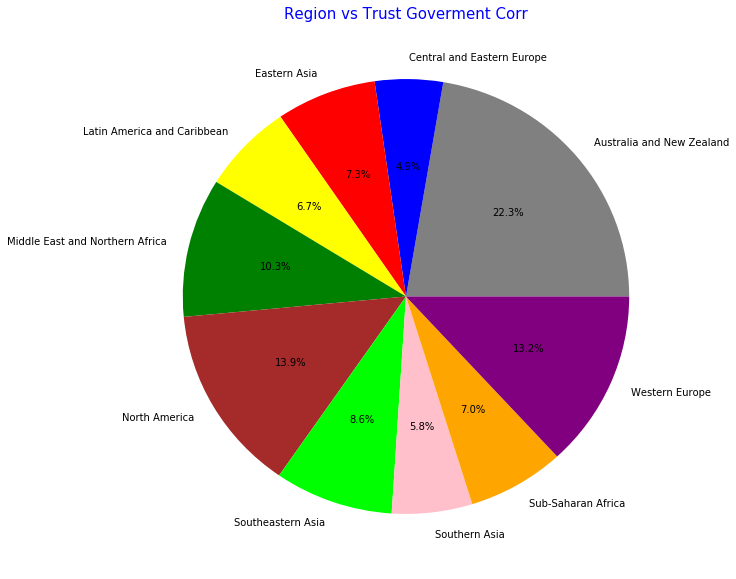

In [18]:
colors = ['grey','blue','red','yellow','green','brown','lime','pink','orange','purple']
explode = [0,0,0,0,0,0,0,0,0,0]
plt.figure(figsize = (10, 10))
plt.pie(data.groupby('Region')['Trust_Goverment_Corruption'].mean().values, explode=explode, labels=data.groupby('Region')['Trust_Goverment_Corruption'].mean().index, colors=colors, autopct='%1.1f%%')
plt.title('Region vs Trust Goverment Corr',color = 'blue',fontsize = 15)
plt.show()

In [19]:
generosity=data.sort_values(by="Generosity",ascending="True")[:20].reset_index()
generosity=generosity.drop('index',axis=1)

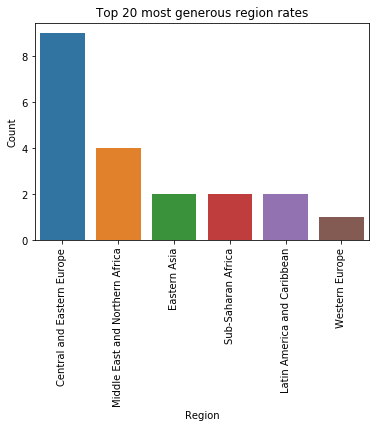

In [20]:
sns.barplot(x=generosity.Region.value_counts().index,y=generosity.Region.value_counts().values)
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Top 20 most generous region rates")
plt.show()

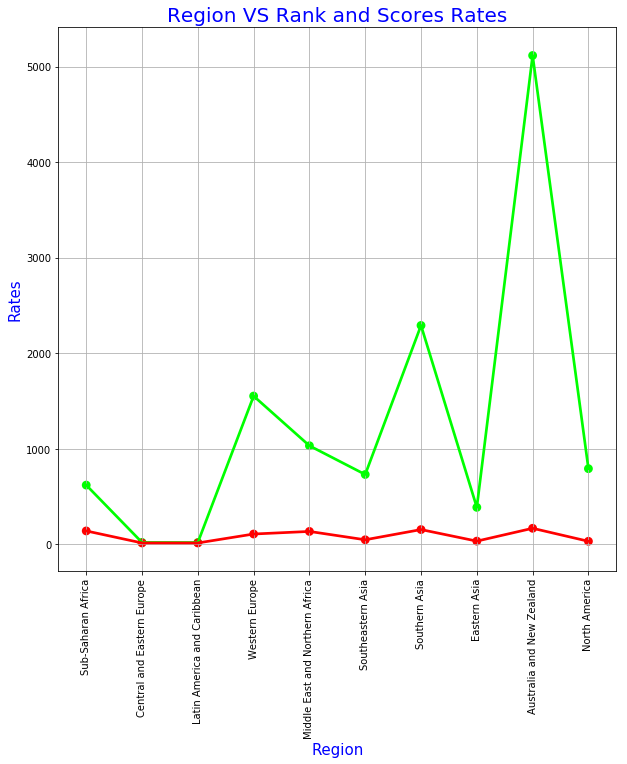

In [22]:
f,ax1=plt.subplots(figsize=(10,10))
sns.pointplot(x=region_index,y=happiess_ranks,data=data,color='lime',alpha=0.8)
sns.pointplot(x=region_index,y=happiess_scores,data=data,color='red',alpha=0.8)
plt.xlabel('Region',fontsize=15,color='blue')
plt.ylabel('Rates',fontsize=15,color='blue')
plt.title('Region VS Rank and Scores Rates',fontsize=20,color='blue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

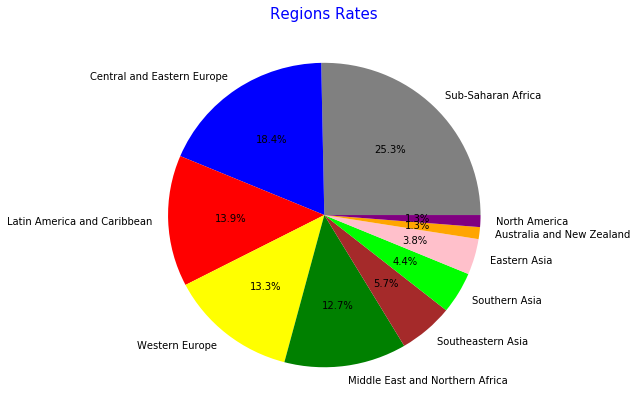

In [25]:
colors = ['grey','blue','red','yellow','green','brown','lime','pink','orange','purple']
explode = [0,0,0,0,0,0,0,0,0,0]
plt.figure(figsize = (7,7))
plt.pie(region_values, explode=explode, labels=region_index, colors=colors, autopct='%1.1f%%')
plt.title('Regions Rates',color = 'blue',fontsize = 15)
plt.show()

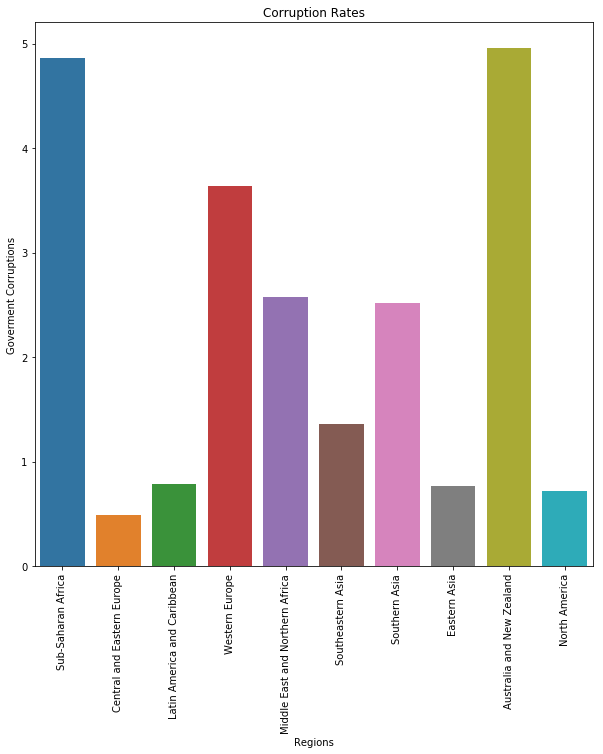

In [27]:
trust_goverment_corr=[]

for col in data.Region.unique():
    trust_goverment_corr.append(sum(data[data['Region']==col].Trust_Goverment_Corruption))
    

plt.figure(figsize=(10,10))
sns.barplot(x=region_index,y=trust_goverment_corr)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.ylabel('Goverment Corruptions')
plt.title('Corruption Rates')
plt.show()

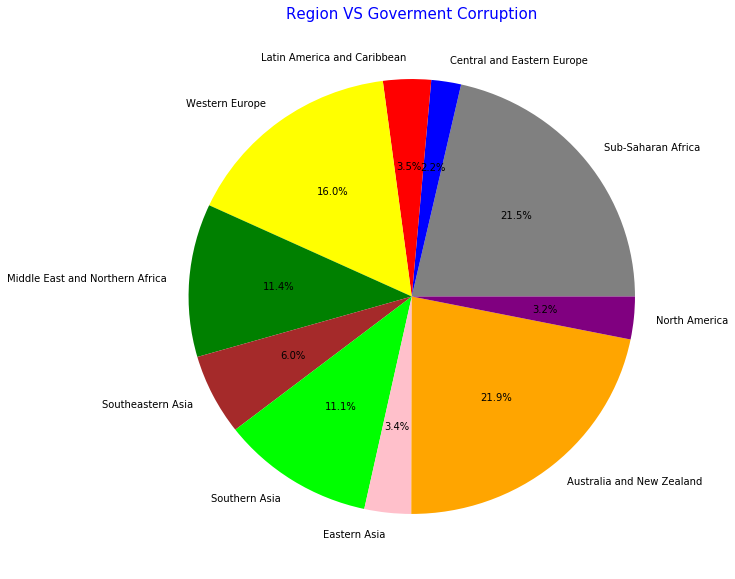

In [28]:
plt.figure(figsize=(10,10))
plt.pie(trust_goverment_corr,explode=explode,labels=region_index,colors=colors,autopct='%1.1f%%')
plt.title('Region VS Goverment Corruption',color='blue',fontsize=15)
plt.show()

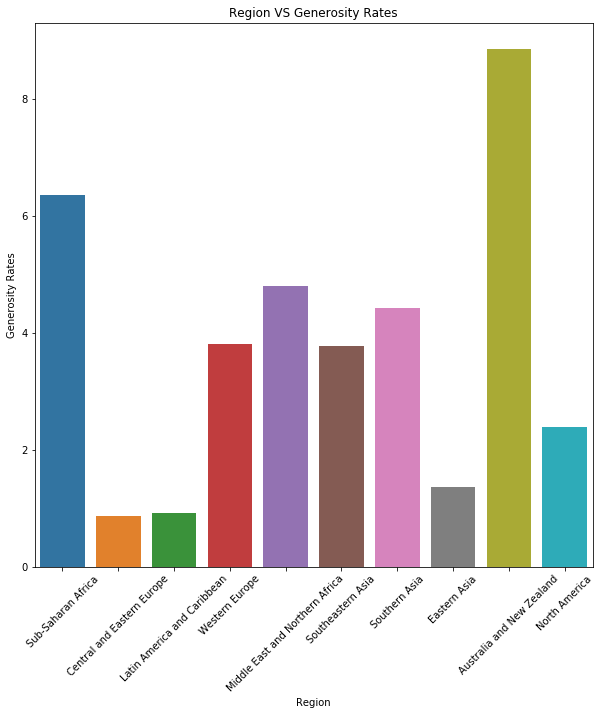

In [29]:
generosity=[]

for col in data.Region.unique():
    generosity.append(sum(data[data['Region']==col].Generosity))

plt.figure(figsize=(10,10))
sns.barplot(x=region_index,y=generosity)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Generosity Rates')
plt.title('Region VS Generosity Rates')
plt.show()

In [31]:
min_d=generosity[0]
max_d=generosity[0]
i=0
min_i=0
max_i=0
for d in generosity:
    if min_d>generosity[i]:
        min_d=generosity[i]
        min_i=i
    elif max_d<generosity[i]:
        max_d=generosity[i]
        max_i=i
    i=i+1

print(region_index[0])
print('The most generosity Rates :'+(region_index[max_i]))
print('The less generosity Rates :'+(region_index[min_i]))

Sub-Saharan Africa
The most generosity Rates :Australia and New Zealand
The less generosity Rates :Central and Eastern Europe


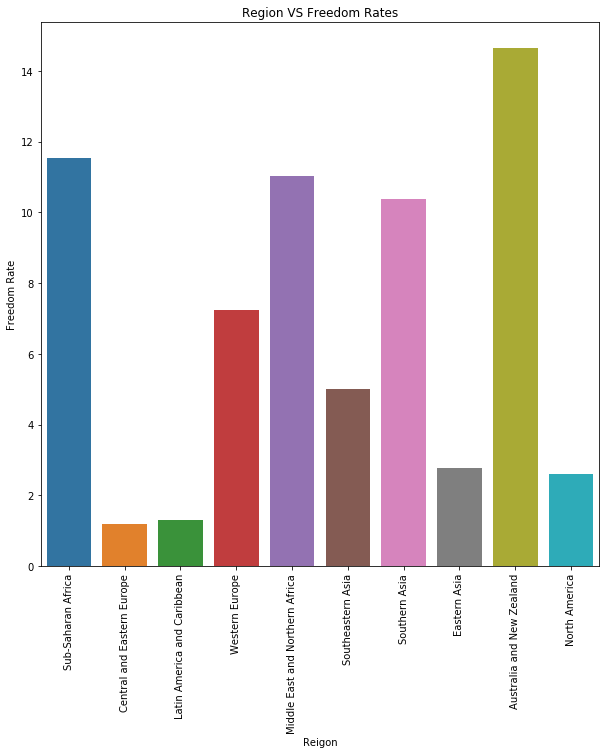

In [32]:
freedom=[]
for c in data.Region.unique():
    freedom.append(sum(data[data['Region']==c].Freedom))

plt.figure(figsize=(10,10))
sns.barplot(x=region_index,y=freedom)
plt.xticks(rotation=90)
plt.xlabel('Reigon')
plt.ylabel('Freedom Rate')
plt.title('Region VS Freedom Rates')
plt.show()

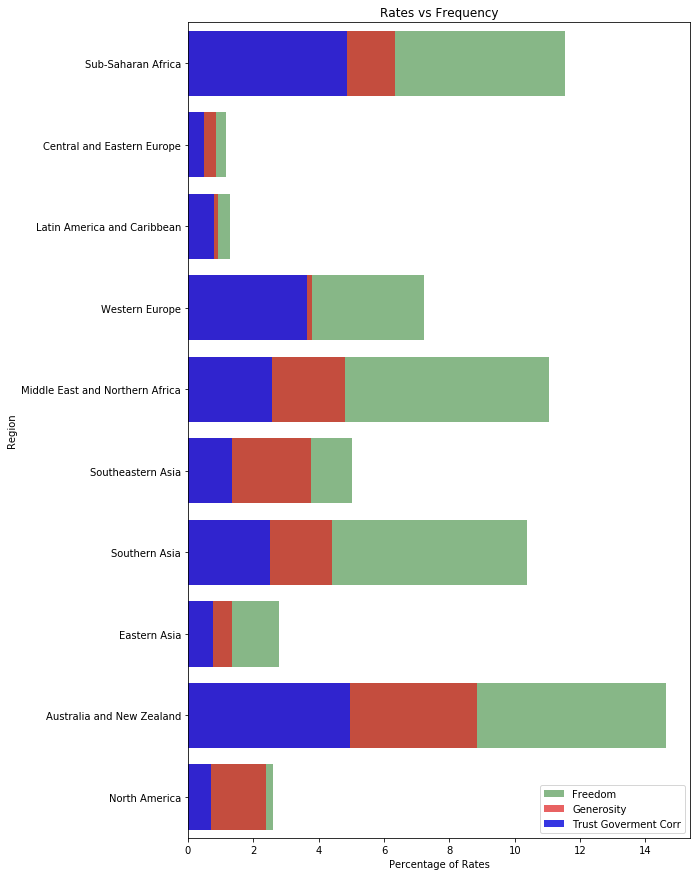

In [33]:
f2,ax2=plt.subplots(figsize=(9,15))
sns.barplot(x=freedom,y=region_index,label='Freedom',color='green',alpha=0.5)
sns.barplot(x=generosity,y=region_index,label='Generosity',color='red',alpha=0.7)
sns.barplot(x=trust_goverment_corr,y=region_index,label='Trust Goverment Corr',color='blue',alpha=0.9)
ax2.legend(loc='lower right',frameon = True)
ax2.set(xlabel='Percentage of Rates', ylabel='Region',title = "Rates vs Frequency")
plt.show()

In [34]:
data.groupby('Region')[['Healt_Life_Expectancy','Freedom','Trust_Goverment_Corruption','Generosity']].mean()

,Healt_Life_Expectancy,Freedom,Trust_Goverment_Corruption,Generosity
Region,,,,
Australia and New Zealand,0.919965,0.645310,0.392795,0.455315
Central and Eastern Europe,0.718774,0.358269,0.086674,0.152264
Eastern Asia,0.877388,0.462490,0.127695,0.225885
Latin America and Caribbean,0.703870,0.501740,0.117172,0.217788
Middle East and Northern Africa,0.705616,0.361751,0.181702,0.190375
North America,0.883710,0.589505,0.244235,0.429580
Southeastern Asia,0.677357,0.557104,0.151276,0.419261
Southern Asia,0.540830,0.373337,0.102536,0.341429
Sub-Saharan Africa,0.282332,0.365944,0.123878,0.221137


In [35]:
data.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standart_Error,Economy_GPD_Capital,Family,Healt_Life_Expectancy,Freedom,Trust_Goverment_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


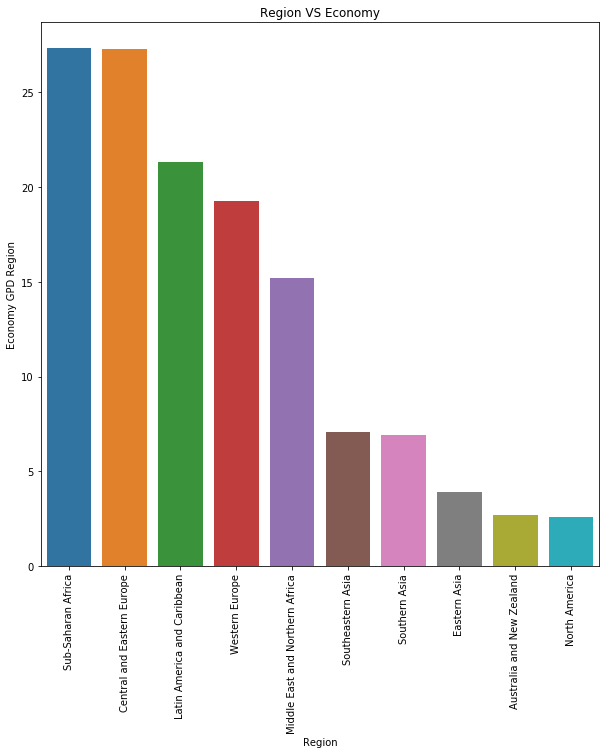

In [36]:
economy_gpd_capital=[]
for c in data.Region.unique():
    economy_gpd_capital.append(sum(data[data['Region']==c].Economy_GPD_Capital))


economy_gpd_capital.sort(reverse=True)

plt.figure(figsize=(10,10))
sns.barplot(x=region_index,y=economy_gpd_capital)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Economy GPD Region')
plt.title('Region VS Economy')
plt.show()  

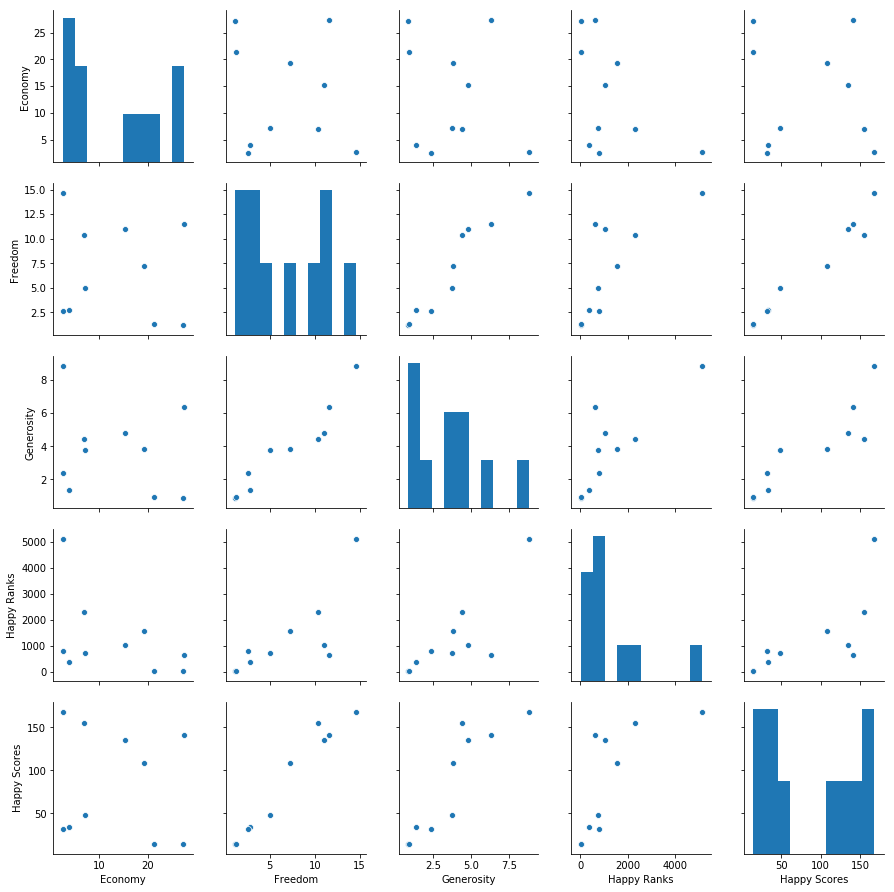

In [37]:
regions=pd.DataFrame(data.Region.unique(),index=range(10),columns=['Region'])
economy=pd.DataFrame(economy_gpd_capital,index=range(10),columns=['Economy'])
freedoms=pd.DataFrame(freedom,index=range(10),columns=['Freedom'])
generositys=pd.DataFrame(generosity,index=range(10),columns=['Generosity'])
happiess_rankss=pd.DataFrame(happiess_ranks,index=range(10),columns=['Happy Ranks'])
happiess_scoress=pd.DataFrame(happiess_scores,index=range(10),columns=['Happy Scores'])

new_data=pd.concat([regions,economy,freedoms,generositys,happiess_rankss,happiess_scoress],axis=1)

sns.pairplot(new_data)
plt.show()

In [38]:
new_data.head()

,Region,Economy,Freedom,Generosity,Happy Ranks,Happy Scores
0,Western Europe,27.33071,11.54845,6.34428,620,140.482
1,North America,27.27051,1.17901,0.85916,20,14.546
2,Australia and New Zealand,21.33947,1.29062,0.91063,19,14.570
3,Middle East and Northern Africa,19.28994,7.23502,3.80751,1552,108.138
4,Latin America and Caribbean,15.21892,11.03827,4.79133,1032,135.183


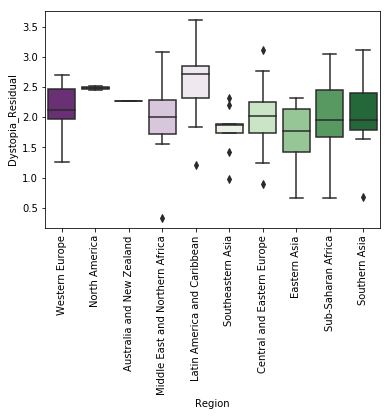

In [39]:
sns.boxplot(x='Region',y='Dystopia_Residual',data=data,palette='PRGn')
plt.xticks(rotation=90)
plt.show()

In [40]:
trace1 = go.Histogram(
    x=new_data['Happy Ranks'],
    opacity=0.75,
    name = "Happy Ranks",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=new_data['Happy Scores'],
    opacity=0.75,
    name = "Happy Scores",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data_new = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' Happy Ranks VS Happy Scores',
                   xaxis=dict(title='Ranks'),
                   yaxis=dict( title='Scores'),
)
fig = go.Figure(data=data_new, layout=layout)
iplot(fig)
plt.show()

In [42]:
print(new_data.Region)

trace1=go.Scatter(
                    x = new_data['Economy'],
                    y = new_data['Freedom'],
                    mode = "markers",
                    name = "Freedom",
                    #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= new_data.Region)

trace2=go.Scatter(
                    x = new_data['Economy'],
                    y = new_data['Generosity'],
                    mode = "markers",
                    name = "Generosity",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= new_data.Region)

data_new = [trace1, trace2]


layout = dict(title = 'Economy VS Freedom',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data_new, layout = layout)
iplot(fig)
plt.show()

0                     Western Europe
1                      North America
2          Australia and New Zealand
3    Middle East and Northern Africa
4        Latin America and Caribbean
5                  Southeastern Asia
6         Central and Eastern Europe
7                       Eastern Asia
8                 Sub-Saharan Africa
9                      Southern Asia
Name: Region, dtype: object


In [43]:
fig = {
  "data": [
    {
      "values": new_data.Freedom,
      "labels": new_data.Region,
      "domain": {"x": [0, .5]},
      "name": "Freedom",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Freedom Rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Rates",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)
plt.show()


In [44]:
data_ = [
    {
        'y': new_data['Economy'],
        'x': new_data['Happy Scores'],
        'mode': 'markers',
        'marker': {
            'size': 10,
            'showscale': True
        },
        "text" :  new_data.Region
    }
]
iplot(data_)
plt.show()

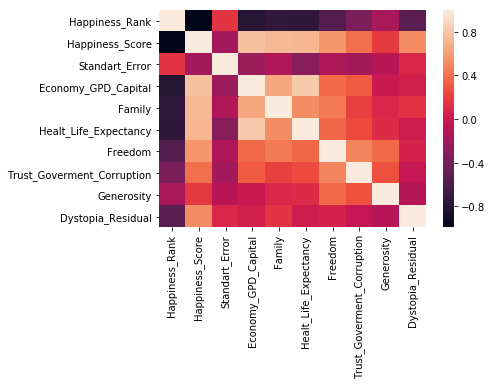

In [45]:
sns.heatmap(data.iloc[:,2:].corr())
plt.show()

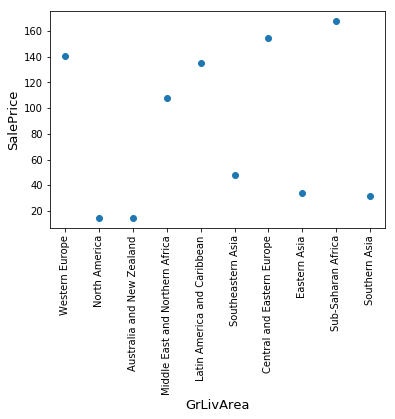

In [46]:
Happiness_Score=[]
for region in data.Region.unique():
    Happiness_Score.append(sum(data[data['Region']==region].Happiness_Score))
    
fig, ax = plt.subplots()
ax.scatter(x = data['Region'].unique(), y =Happiness_Score)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.xticks(rotation=90)
plt.show()

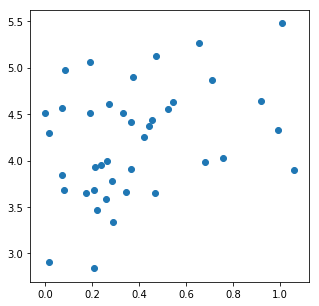

In [47]:
data.Region.value_counts()
plt.figure(figsize=(5,5))
plt.scatter(x=data[data['Region']=="Sub-Saharan Africa"].Economy_GPD_Capital,y=data[data['Region']=="Sub-Saharan Africa"].Happiness_Score)
plt.show()

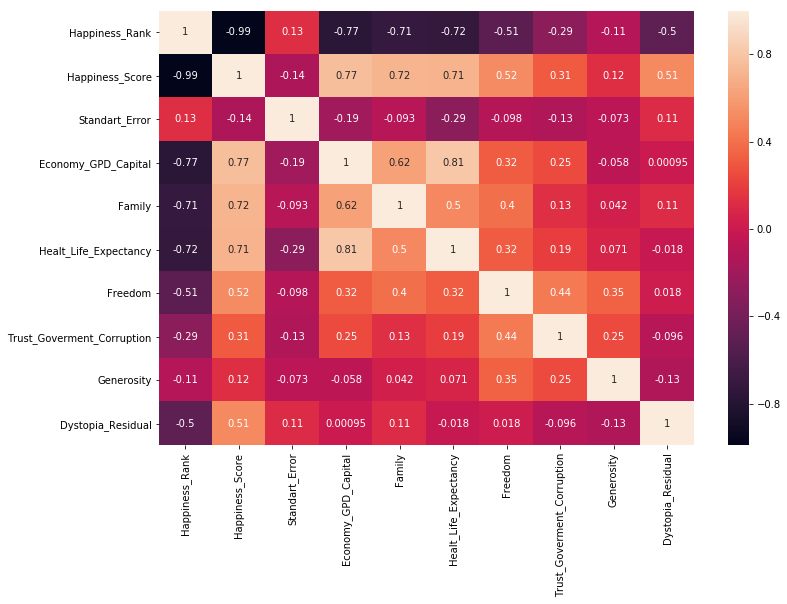

In [48]:
plt.subplots(figsize=(12, 8))
top_corr = data[abs(data['Happiness_Rank']>6.5)].corr()
sns.heatmap(top_corr, annot=True)
plt.show()


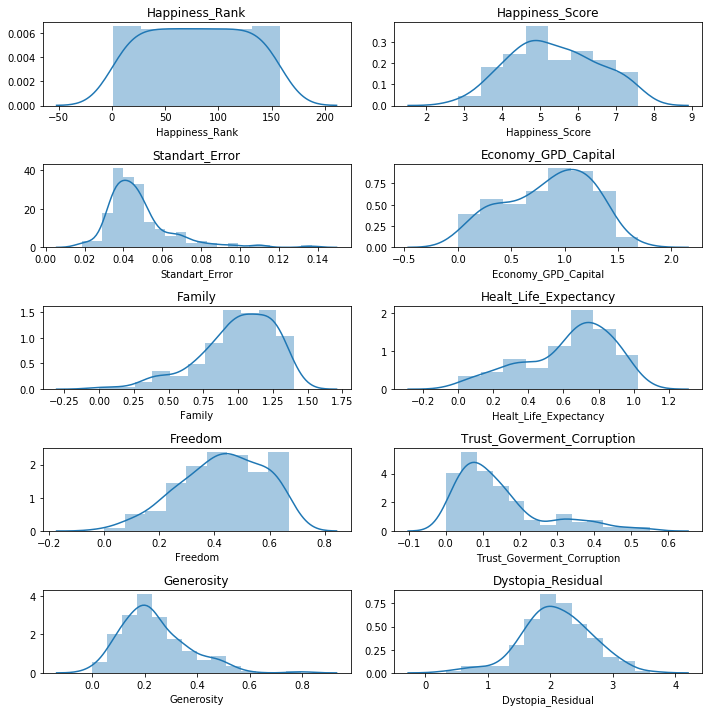

In [49]:
for i,col in enumerate(data.columns[2:]):
    plt.subplot(5,2 ,i+1)
    sns.distplot(data[col])
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

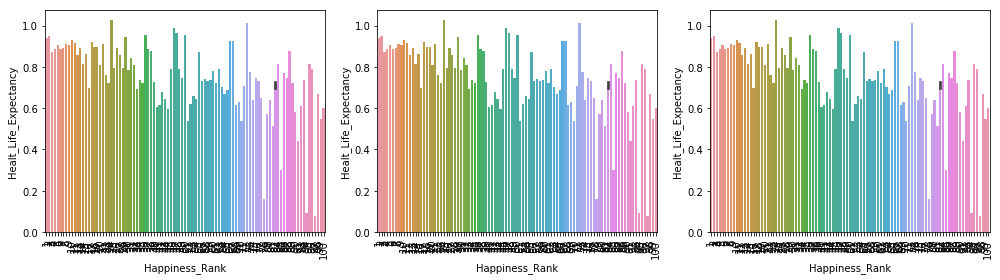

In [50]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'Happiness_Rank', y = 'Healt_Life_Expectancy', data = data[:100])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot(x = 'Happiness_Rank', y = 'Healt_Life_Expectancy', data = data[:100])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.barplot(x = 'Happiness_Rank', y = 'Healt_Life_Expectancy', data = data[:100])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

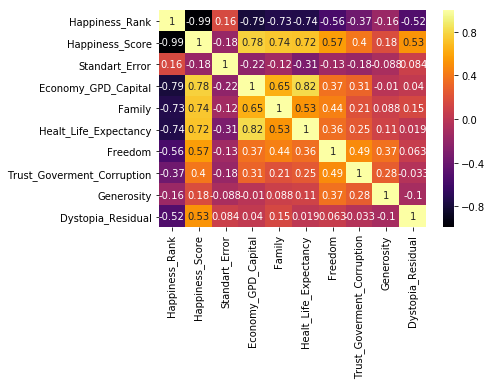

In [51]:
sns.heatmap(data.corr(), annot = True, cmap='inferno')
plt.show()

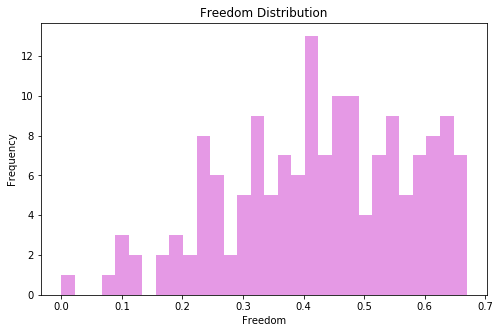

In [52]:
plt.figure(figsize=(8,5))
sns.distplot(data['Freedom'], kde = False, color='m', bins = 30)
plt.ylabel('Frequency')
plt.title('Freedom Distribution')
plt.show()

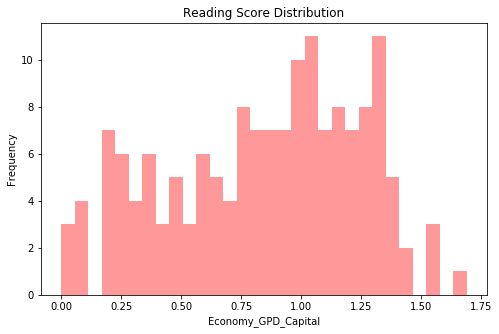

In [53]:
plt.figure(figsize=(8,5))
sns.distplot(data['Economy_GPD_Capital'], kde = False, color='r', bins = 30)
plt.ylabel('Frequency')
plt.title('Reading Score Distribution')
plt.show()

In [54]:
data=data.drop('Country',axis=1)

In [55]:
data=data.drop('Happiness_Rank',axis=1)

In [56]:
data['Healt_Life_Expectancy']=[1 if healt_value>0.75 else 0 for healt_value in data.Healt_Life_Expectancy]

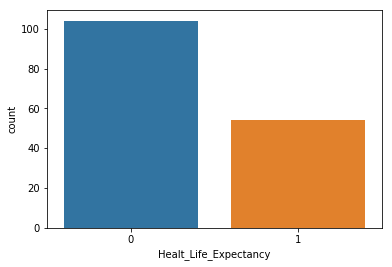

In [57]:
data.Healt_Life_Expectancy.value_counts()
sns.countplot(data.Healt_Life_Expectancy)
plt.show()

In [58]:
data_healt_life=data['Healt_Life_Expectancy']
data=data.drop('Healt_Life_Expectancy',axis=1)

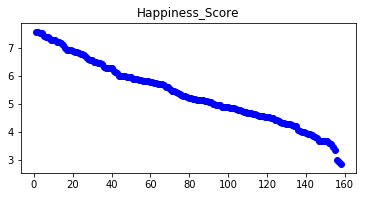

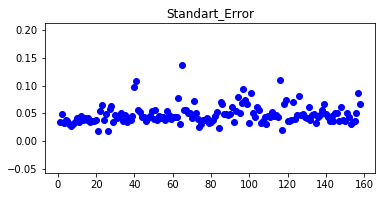

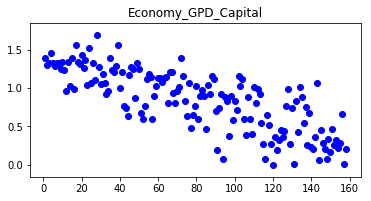

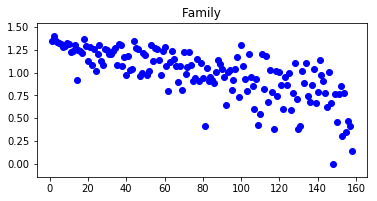

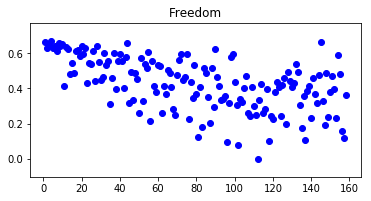

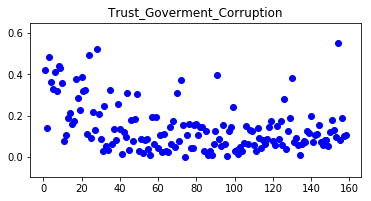

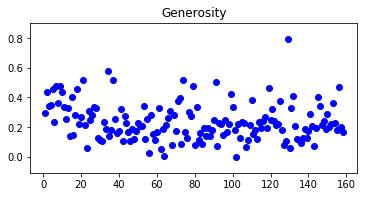

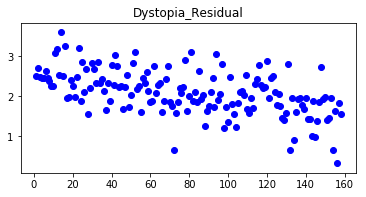

In [59]:
row_id=1
for col in data.columns:
    if col!='Region':
        plt.subplot(4,2,row_id)
        row_id=row_id+1
        plt.title(col)
        plt.scatter(x=np.arange(1,159),y=data[col],color='b')
        fig, ax = plt.gcf(), plt.gca()
        fig.set_size_inches(10, 10)
        plt.tight_layout()
        plt.show()